In [6]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [6]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [7]:
#Loading and reading the data
df=pd.read_csv('obesity_data.csv')

In [8]:
#the first five data points
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [9]:
#the last five data points
df.tail()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight
999,66,Female,178.537130,74.962164,23.517168,1,Normal weight


In [10]:
#checking the number of rows and columns
df.shape

(1000, 7)

In [11]:
#column names
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
       'ObesityCategory'],
      dtype='object')

In [12]:
#typecasting all column names to lower case
columns=[col.lower()for col in df.columns]
df.columns=columns
df.columns

Index(['age', 'gender', 'height', 'weight', 'bmi', 'physicalactivitylevel',
       'obesitycategory'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int64  
 1   gender                 1000 non-null   object 
 2   height                 1000 non-null   float64
 3   weight                 1000 non-null   float64
 4   bmi                    1000 non-null   float64
 5   physicalactivitylevel  1000 non-null   int64  
 6   obesitycategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [14]:
df.isnull().sum()

age                      0
gender                   0
height                   0
weight                   0
bmi                      0
physicalactivitylevel    0
obesitycategory          0
dtype: int64

In [17]:
df.obesitycategory.unique()
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df.obesitycategory.value_counts()
df.gender.value_counts()

gender
Male      523
Female    477
Name: count, dtype: int64

In [18]:
df.describe()

,age,height,weight,bmi,physicalactivitylevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


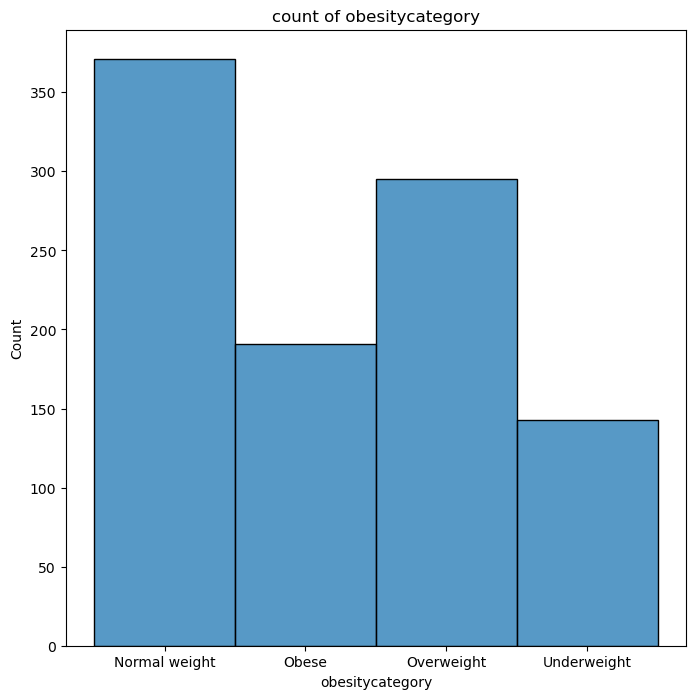

In [23]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='obesitycategory')
plt.title("count of obesitycategory")
plt.show()

<Axes: >

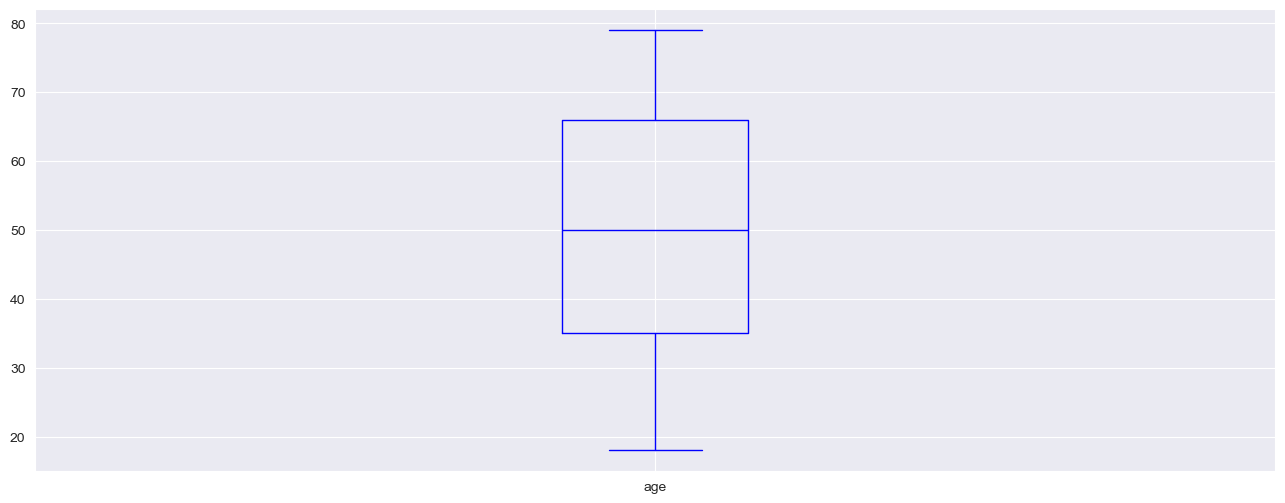

In [53]:
df.age.plot(kind='box',color='b')

<Axes: xlabel='obesitycategory', ylabel='Count'>

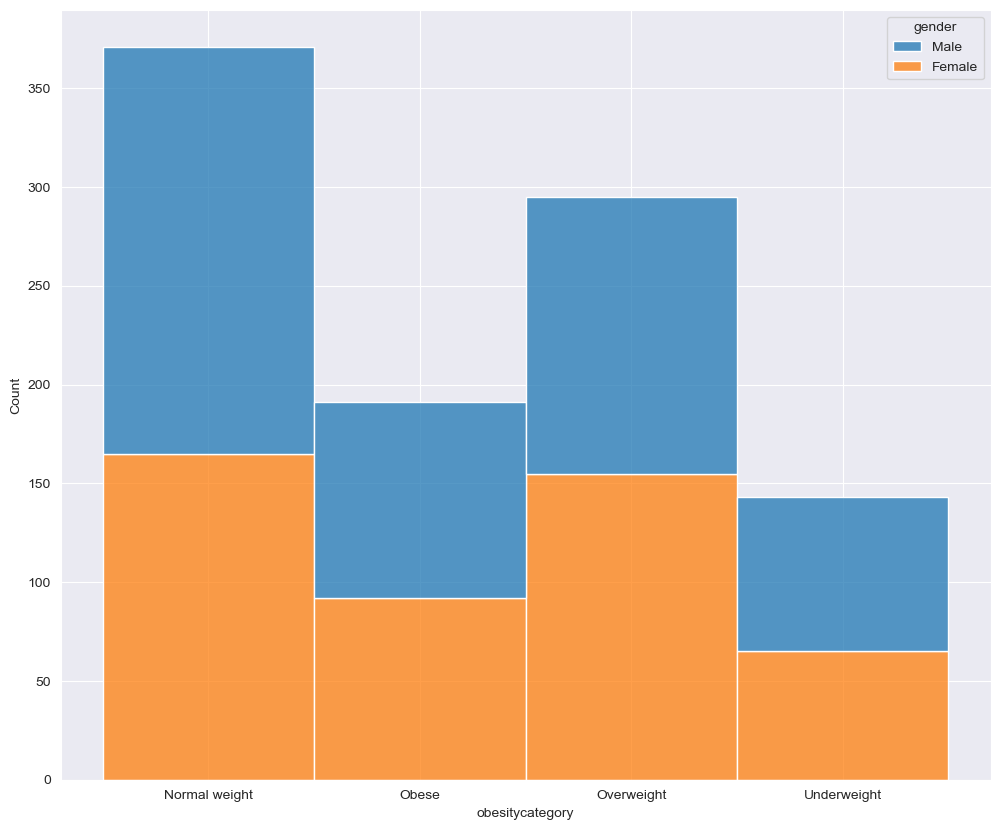

In [54]:
plt.figure(figsize=(12,10))
sns.histplot(data=df, x="obesitycategory", hue="gender", multiple="stack",stat="count", discrete=True)

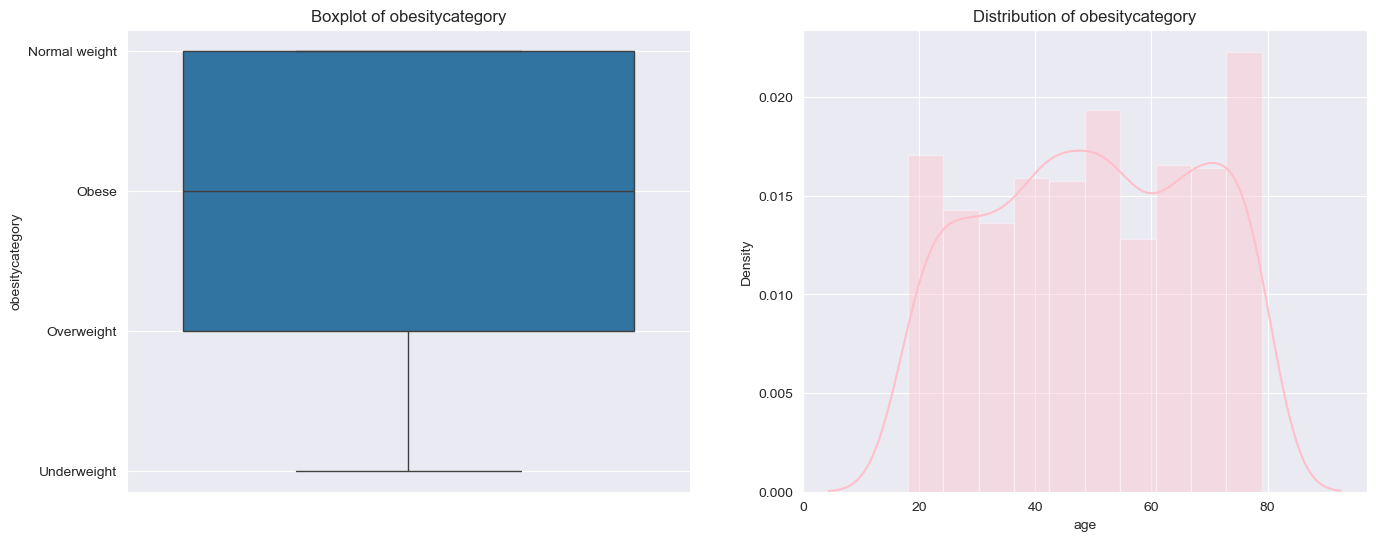

In [55]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (16, 6)
sns.set_style("darkgrid")
sns.boxplot(df['obesitycategory'])
plt.title('Boxplot of obesitycategory')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = (16,6)
sns.distplot(df['age'],color= 'pink' )
plt.title('Distribution of obesitycategory')
plt.show()

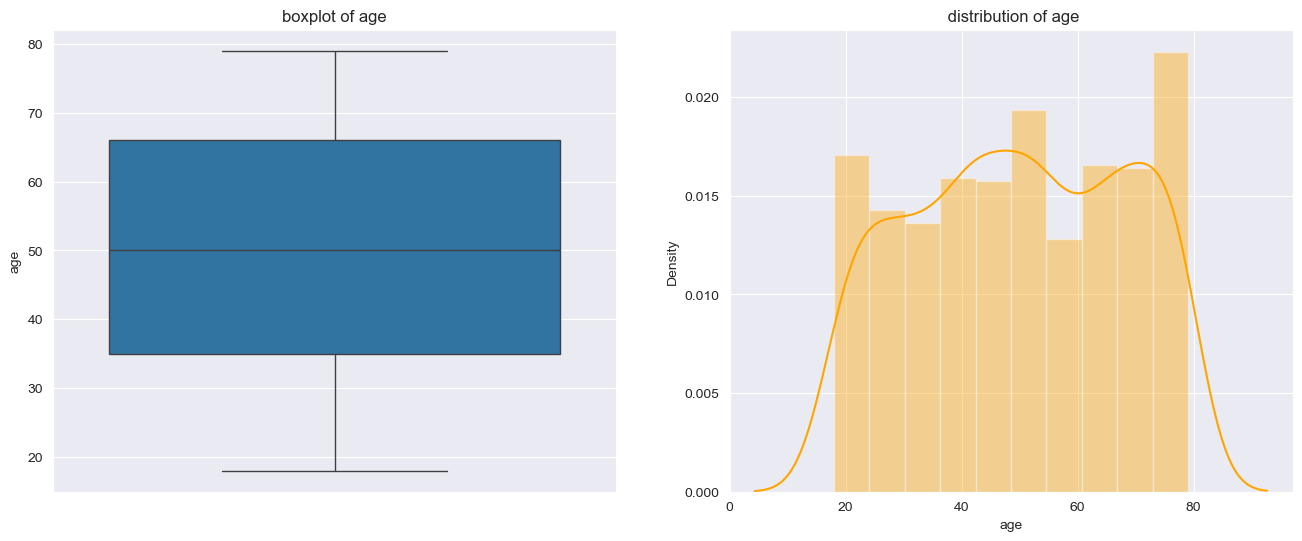

In [56]:
plt.subplot(1,2,1)


plt.rcParams['figure.figsize']=(16,6)
sns.set_style("darkgrid")
sns.boxplot(df['age'])
plt.title('boxplot of age')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize']=(16,6)
sns.distplot(df['age'],color='orange') 
plt.title(' distribution of age')
plt.show()


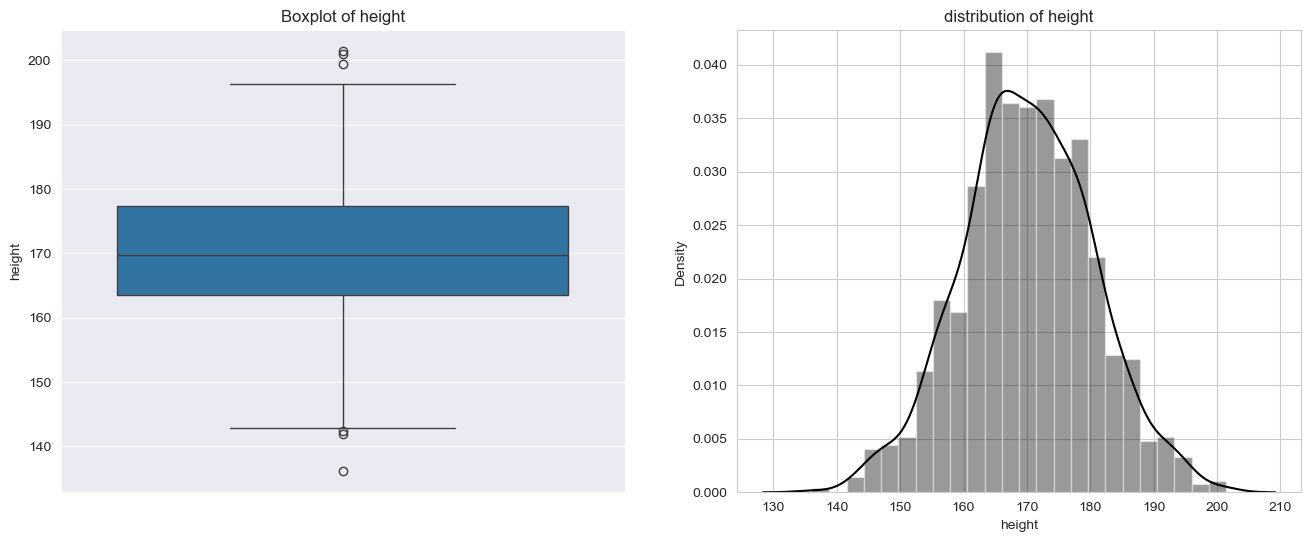

In [57]:
plt.subplot(1,2,1)

plt.rcParams['figure.figsize']=(15,6)
sns.set_style("whitegrid")
sns.boxplot(df['height'])
plt.title('Boxplot of height')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize']=(15,6)
sns.distplot(df['height'],color='black')
plt.title('distribution of height')
plt.show()

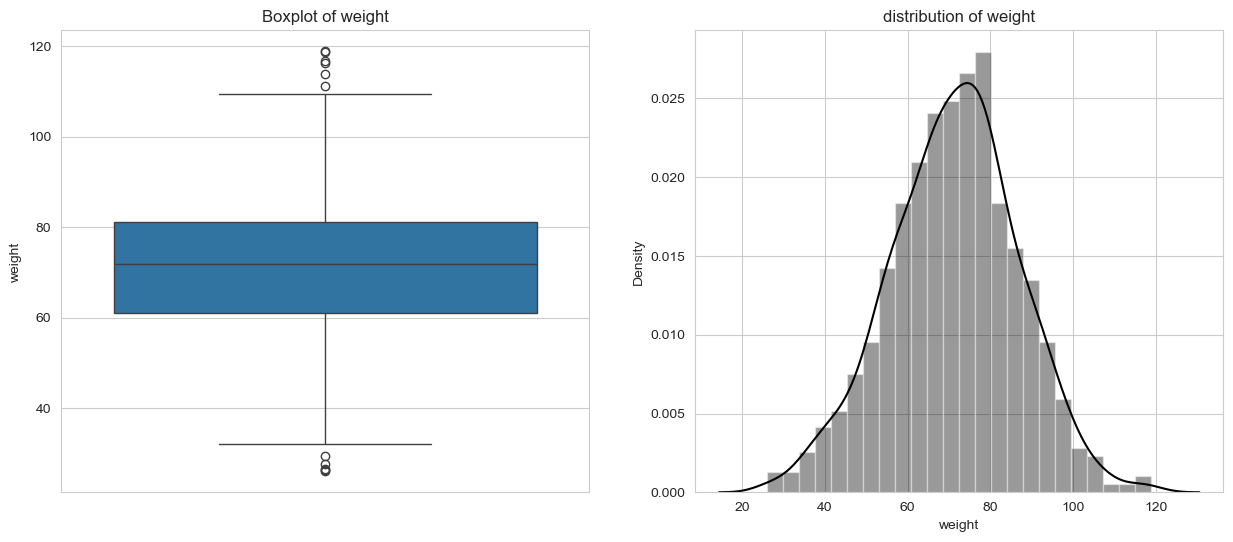

In [58]:
plt.subplot(1,2,1)

plt.rcParams['figure.figsize']=(15,6)
sns.set_style("whitegrid")
sns.boxplot(df['weight'])
plt.title('Boxplot of weight')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize']=(15,6)
sns.distplot(df['weight'],color='black')
plt.title('distribution of weight')
plt.show()

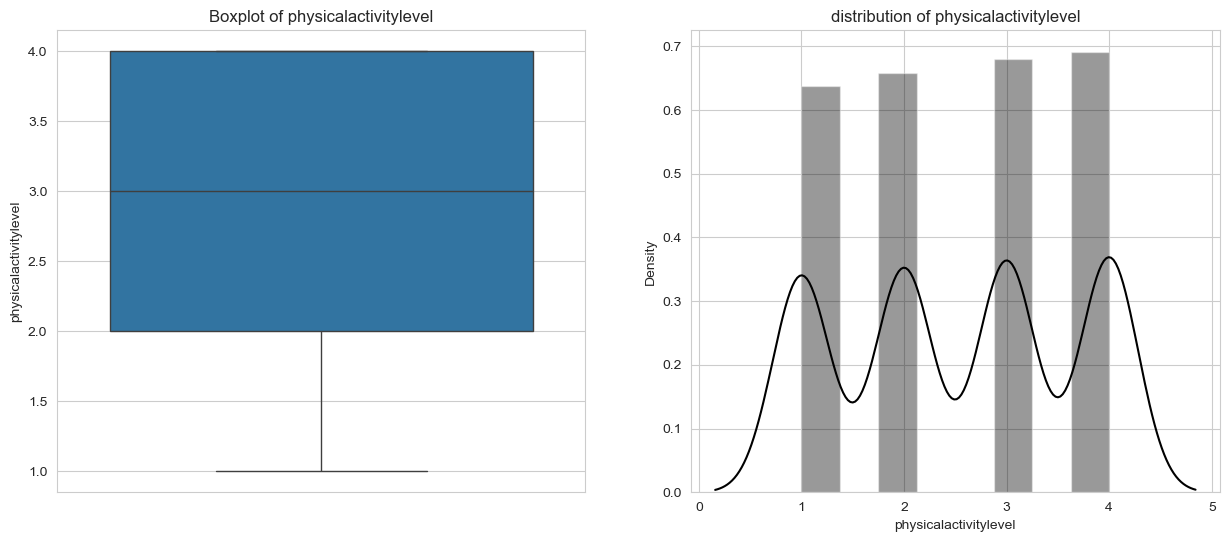

In [59]:
plt.subplot(1,2,1)

plt.rcParams['figure.figsize']=(15,6)
sns.set_style("whitegrid")
sns.boxplot(df['physicalactivitylevel'])
plt.title('Boxplot of physicalactivitylevel')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize']=(15,6)
sns.distplot(df['physicalactivitylevel'],color='black')
plt.title('distribution of physicalactivitylevel')
plt.show()

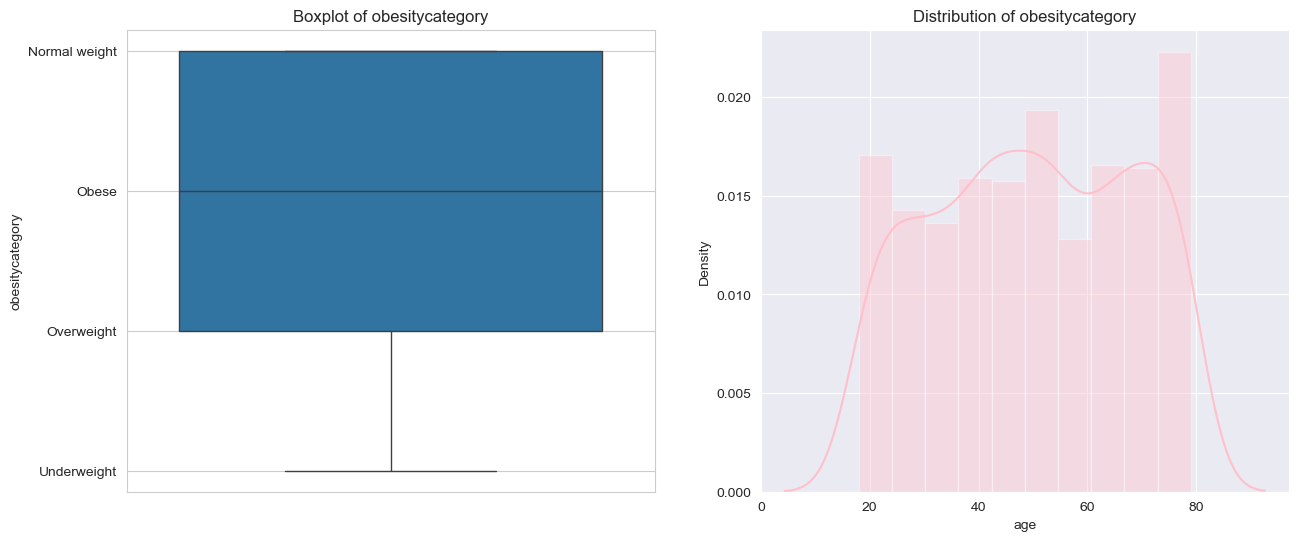

In [60]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (16, 6)
sns.set_style("darkgrid")
sns.boxplot(df['obesitycategory'])
plt.title('Boxplot of obesitycategory')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = (16,6)
sns.distplot(df['age'],color= 'pink' )
plt.title('Distribution of obesitycategory')
plt.show()

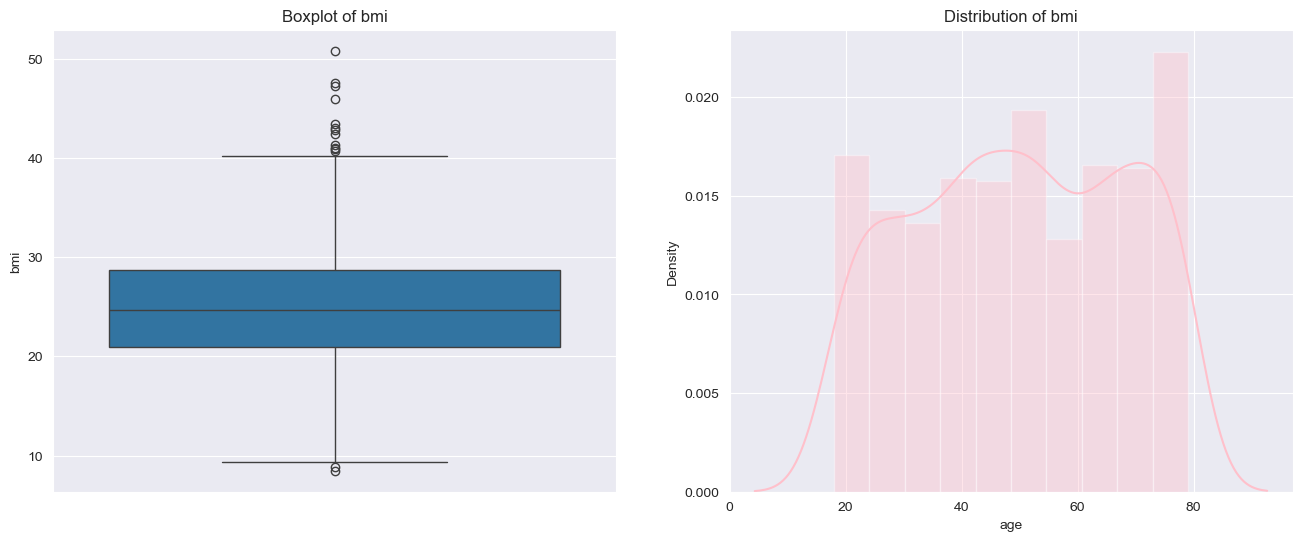

In [61]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (16, 6)
sns.set_style("darkgrid")
sns.boxplot(df['bmi'])
plt.title('Boxplot of bmi')

plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = (16,6)
sns.distplot(df['age'],color= 'pink' )
plt.title('Distribution of bmi')
plt.show()

<Axes: xlabel='count', ylabel='obesitycategory'>

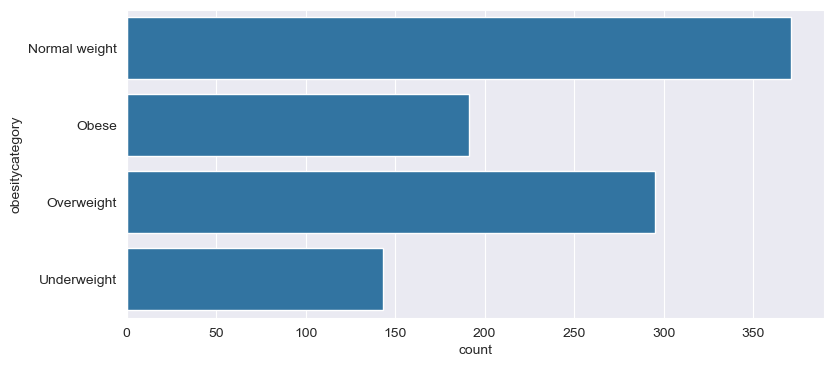

In [62]:
plt.figure(figsize =(9,4))
sns.countplot(df.obesitycategory)

<Axes: xlabel='obesitycategory', ylabel='age'>

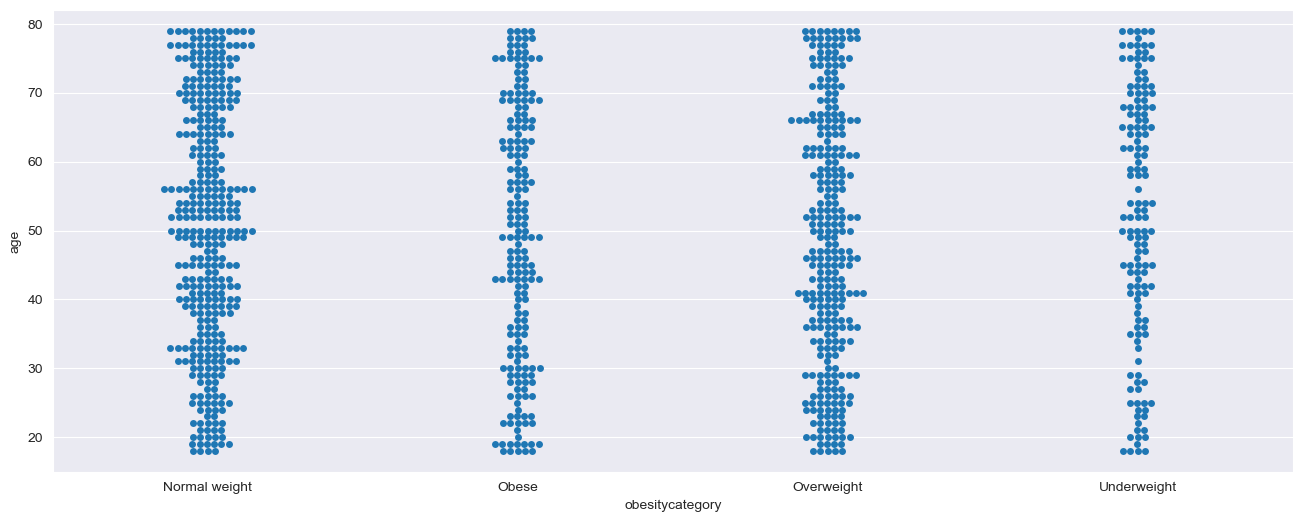

In [63]:
sns.swarmplot(data=df,x='obesitycategory',y='age')

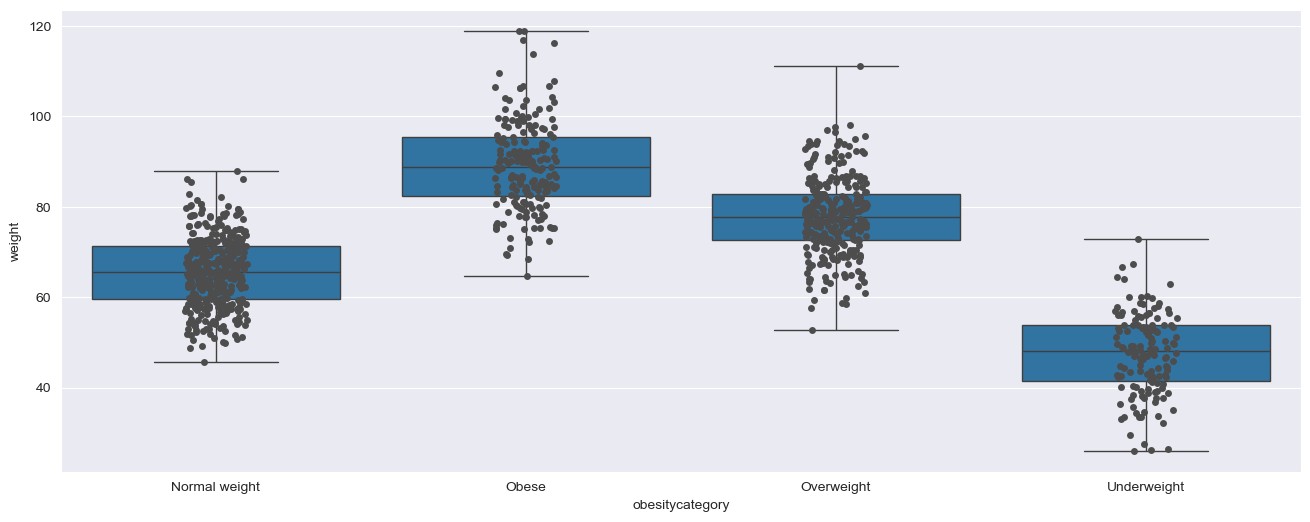

In [64]:
ax = sns.boxplot(x="obesitycategory" , y="weight" , data=df , whis=np.inf)
ax = sns.stripplot(x="obesitycategory" , y="weight" , data=df , color=".3")

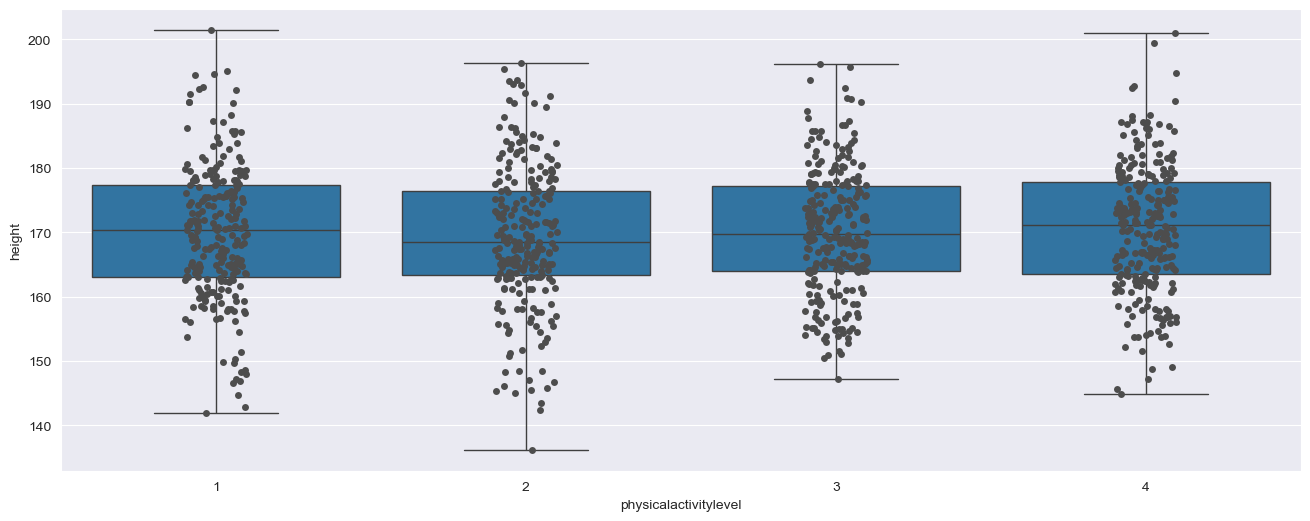

In [65]:
ax = sns.boxplot(x="physicalactivitylevel",y="height",data=df,whis=np.inf)
ax = sns.stripplot(x="physicalactivitylevel",y="height",data=df,color=".3")

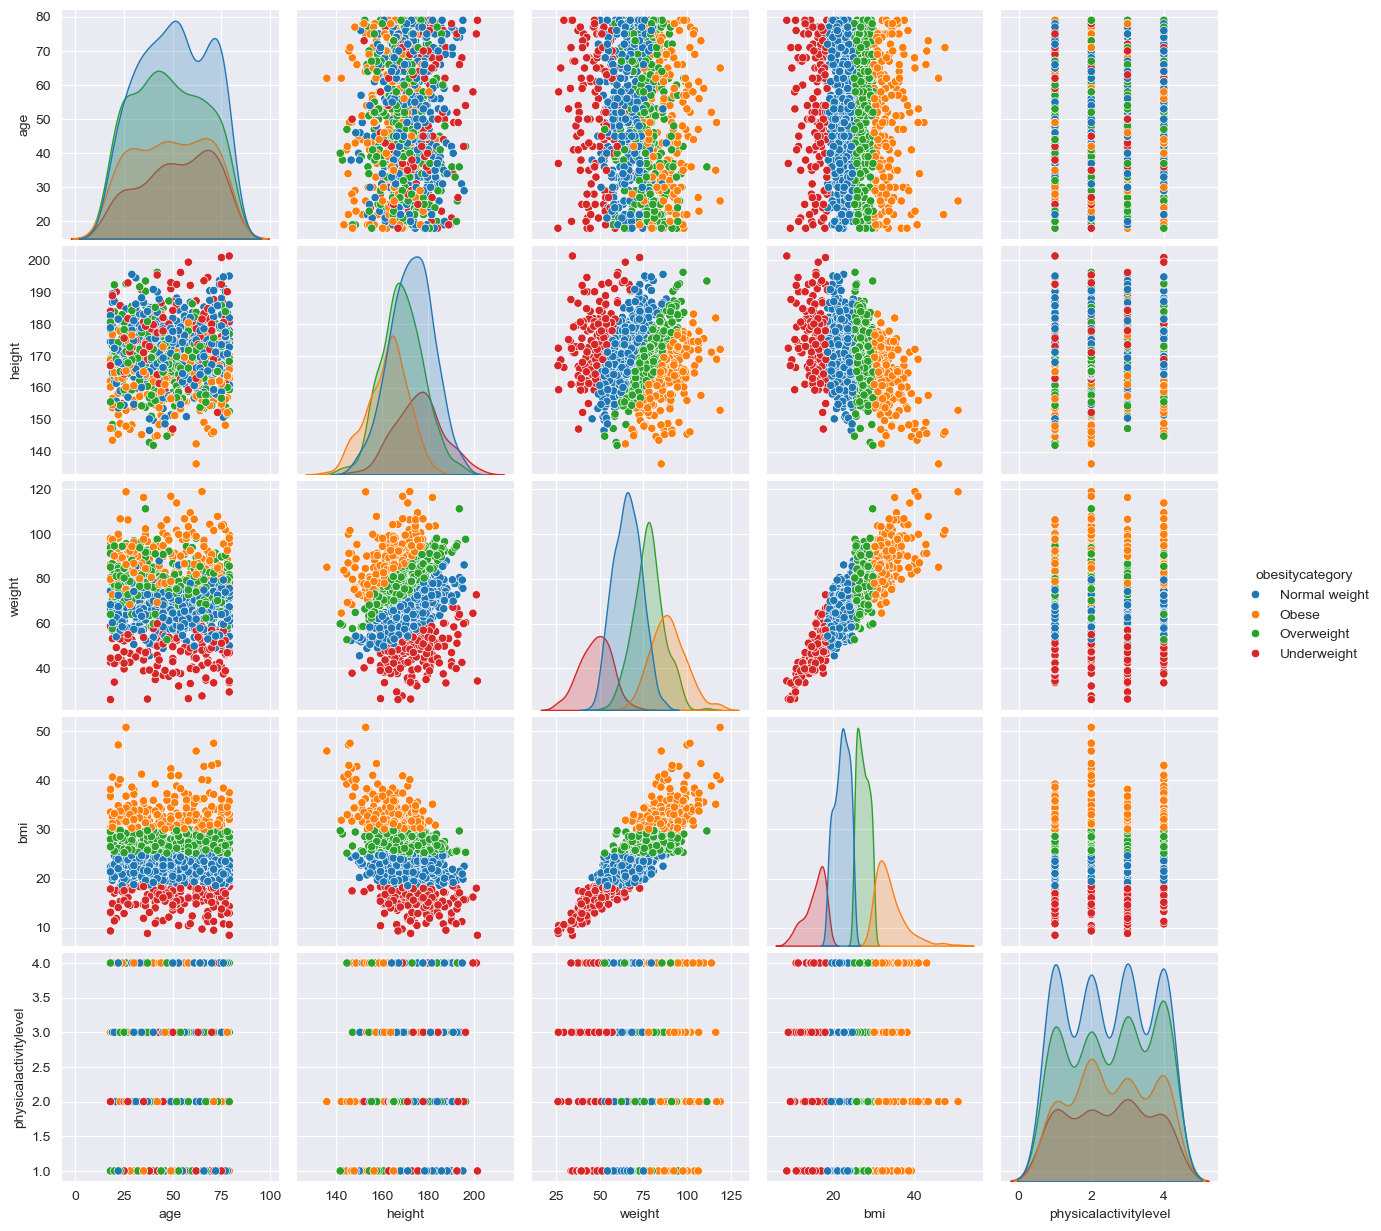

In [66]:
sns.pairplot(df,hue='obesitycategory')

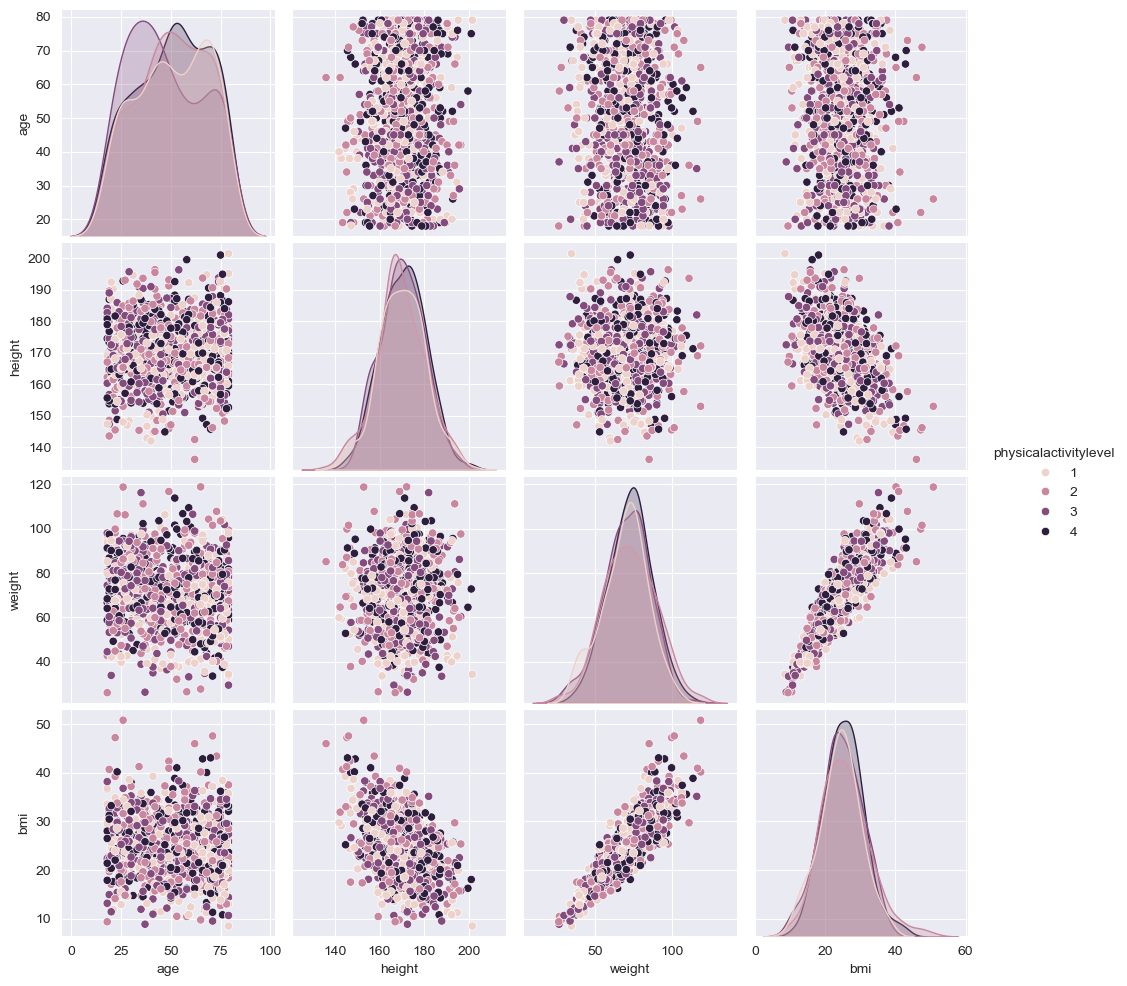

In [67]:
sns.pairplot(df,hue='physicalactivitylevel')

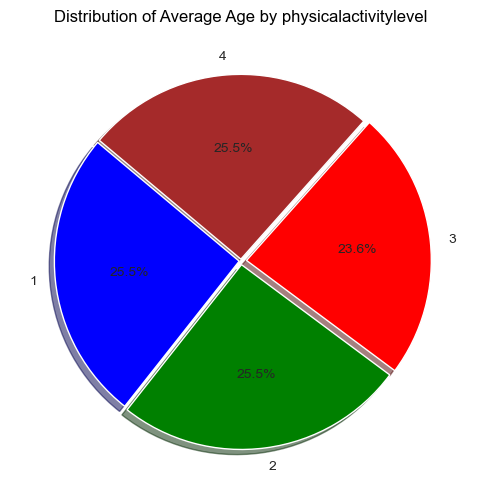

In [68]:
df.groupby('physicalactivitylevel').age.mean().plot.pie(
    autopct='%1.1f%%',
    explode=[0.01,0.02,0.03,0.01],
    colors=['blue','green','red','brown'],
    startangle=140,
    shadow=True,
)
plt.ylabel('')
plt.title('Distribution of Average Age by physicalactivitylevel',color='black')
plt.show()

In [69]:
df.gender=df.gender.map({'Male' : 1, 'Female' : 0})
df.obesitycategory=df.obesitycategory.map({'Normal weight':0, 'Overweight':1, 'Obese':2, 'Underweight':3})

In [70]:
df.sample(5)

,age,gender,height,weight,bmi,physicalactivitylevel,obesitycategory
426,50,0,158.578735,64.531763,25.661594,4,1
780,66,1,156.862422,63.211575,25.689685,3,1
85,67,0,171.021289,35.699231,12.205582,1,3
687,41,0,163.791548,37.650990,14.034386,3,3
422,25,1,180.288383,77.307467,23.784058,3,0


In [71]:
X=df.drop(columns='obesitycategory')
Y=df['obesitycategory']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=76)

In [38]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X=pd.DataFrame(X_scaler,columns=X.columns)
X

,age,gender,height,weight,bmi,physicalactivitylevel
0,0.339295,NaN,0.341864,0.050076,-0.160970,1.313943
1,1.057320,NaN,-0.574985,1.209739,1.374115,-0.478612
2,-0.213033,NaN,-0.192164,0.111266,0.150129,1.313943
3,-0.986291,NaN,-0.154567,0.882535,0.811514,0.417665
4,0.560226,NaN,1.311635,-0.139776,-0.710797,0.417665
...,...,...,...,...,...,...
995,-1.759549,NaN,-1.403591,-0.458170,0.257160,1.313943
996,-0.820593,NaN,-0.482874,1.705189,1.767533,-1.374890
997,-0.047334,NaN,-1.308268,0.490161,1.172337,-1.374890
998,0.781156,NaN,-0.568685,-0.853282,-0.546350,1.313943


In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=76)
model1=LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [82]:
pred1=model1.predict(X_test)

In [83]:
accuracy_score(Y_test,pred1)


0.98

In [84]:
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)


DecisionTreeClassifier()

In [85]:
pred2=model2.predict(X_test)

In [86]:
accuracy_score(Y_test,pred2)

1.0

In [87]:
print("Logistic Regression")
print(classification_report(Y_test,pred1))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.94      1.00      0.97        62
           2       1.00      0.94      0.97        36
           3       1.00      1.00      1.00        29

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [80]:
print("Decision Tree")
print(classification_report(Y_test,pred2))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

